### STEP 1 - LOAD THE DATA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Administrator\Downloads\global_disaster_response_2018_2024 (1).csv")

# Quick checks
print("Shape:", df.shape)        # Should print (50000, 12)
df.head()
df.info()
df.describe()

Shape: (50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


severity_index    casualties  economic_loss_usd  response_time_hours  \
count    50000.000000  50000.000000       5.000000e+04         50000.000000   
mean         5.015769    100.591140       5.068593e+06            12.183027   
std          1.942843     65.052064       3.268541e+06             9.259081   
min          1.000000      0.000000       5.273900e+02             1.000000   
25%          3.660000     51.000000       2.585513e+06             6.270000   
50%          4.990000     91.000000       4.548351e+06            10.510000   
75%          6.340000    138.000000       6.950615e+06            15.450000   
max         10.000000    524.000000       2.445624e+07            63.100000   

       aid_amount_usd  response_efficiency_score  recovery_days      latitude  \
count    5.000000e+04               50000.000000   50000.000000  50000.000000   
mean     2.500003e+05                  87.574025      49.682560      0.231205   
std      1.432275e+05                  10.188961      20.098944     34.759662   
min      1.660000e+01                  29.750000       2.000000    -59.994000   
25%      1.429663e+05                  83.060000      36.000000    -29.848250   
50%      2.305365e+05                  89.180000      49.000000      0.267500   
75%      3.352259e+05                  94.700000      63.000000     30.488250   
max      1.126465e+06                 100.000000     112.000000     59.997000   

          longitude  
count  50000.000000  
mean       0.089889  
std       98.380208  
min     -169.998000  
25%      -85.551750  
50%        0.390500  
75%       85.665000  
max      169.999000

### STEP 2 - CHECK FOR MISSING VALUES

In [7]:
# Missing values per column
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

# Are there ANY missing values?
print("\nAny missing in dataset?", df.isnull().any().any())  # THERE IS NO MISSING VALUES IN THE DATA

Missing values per column:
date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

Any missing in dataset? False


### STEP 3 - CONVERT DATE AND CREATE EXTRA COLUMNS

In [8]:
# the date column is currently stored as an object (typically a string). 
# To perform any time-series analysis or filter by year in 2026, we should convert it to a datetime object. 

# Convert to datetime
df["date"] = pd.to_datetime(df["date"])

# Create year and month columns
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [9]:
#  creating a target column for ML: high_efficiency (1 if response_efficiency_score ≥ 90, else 0)
#  creating a severity category for nicer plots (Low/Medium/High)
# Binary target: high_efficiency
df["high_efficiency"] = (df["response_efficiency_score"] >= 90).astype(int)

# Check class balance
print("Class counts (0 = low, 1 = high):")
print(df["high_efficiency"].value_counts())

Class counts (0 = low, 1 = high):
high_efficiency
0    26874
1    23126
Name: count, dtype: int64


In [10]:
# We will use some of these as features and some just for visualization.

bins_sev = [0, 4, 7, 10]
labels_sev = ["Low", "Medium", "High"]
df["severity_category"] = pd.cut(
    df["severity_index"],
    bins=bins_sev,
    labels=labels_sev
)

### STEP 4 - TRYING WITH PLOTS

In [11]:
sns.set(style="whitegrid")

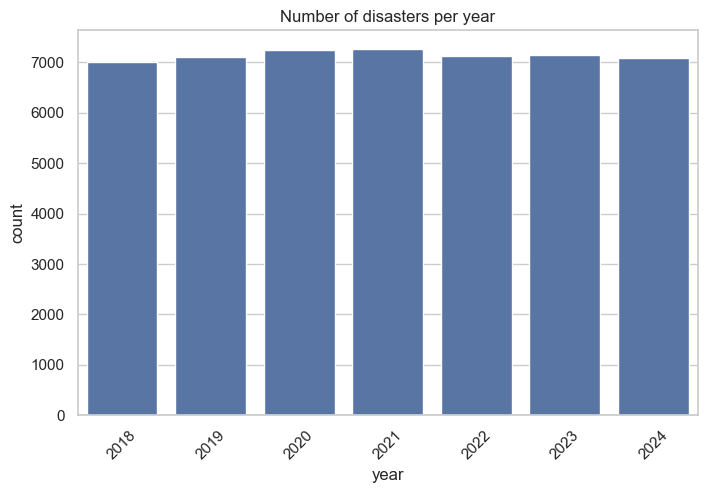

In [13]:
# How many disasters per year?

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="year")
plt.title("Number of disasters per year")
plt.xticks(rotation=45)
plt.show()

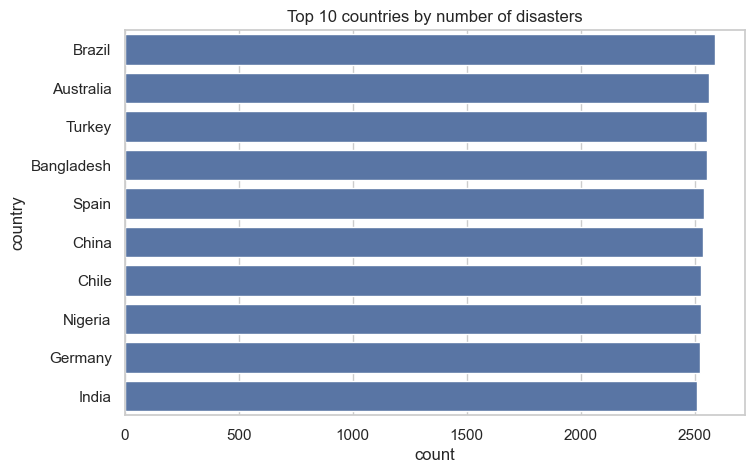

In [15]:
# Top 10 countries by number of disasters
top_countries = df["country"].value_counts().head(10).index

plt.figure(figsize=(8,5))
sns.countplot(data=df[df["country"].isin(top_countries)], y="country", order=top_countries)
plt.title("Top 10 countries by number of disasters")
plt.show()  # These 10 countries have the highest number of recorded disaster events in the dataset

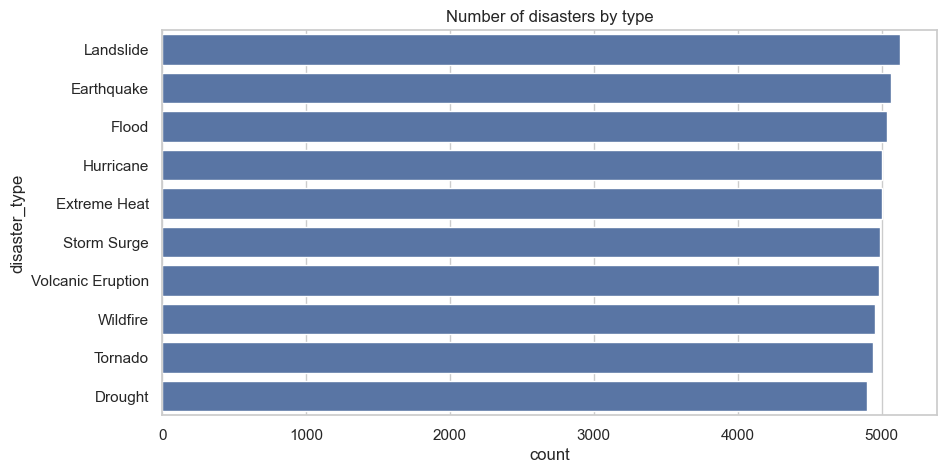

In [16]:
# Disaster types

plt.figure(figsize=(10,5))
sns.countplot(data=df, y="disaster_type", order=df["disaster_type"].value_counts().index)
plt.title("Number of disasters by type")
plt.show()

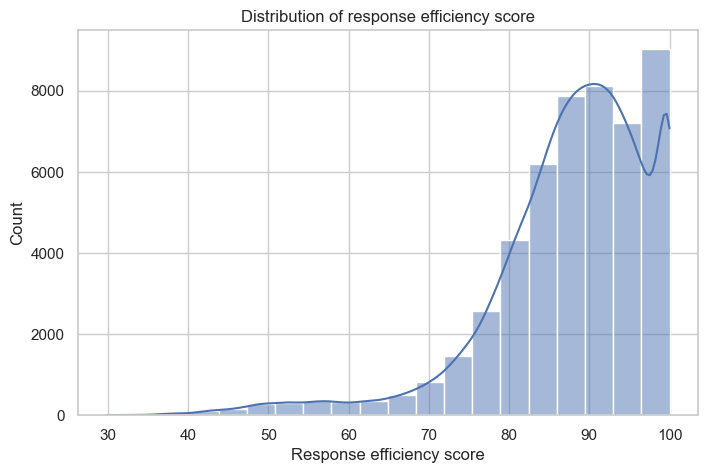

In [18]:
# Distribution of response_efficiency_score

plt.figure(figsize=(8,5))
sns.histplot(df["response_efficiency_score"], bins=20, kde=True)
plt.title("Distribution of response efficiency score")
plt.xlabel("Response efficiency score") # Most response efficiency scores are concentrated around [low/mid/high] values
plt.show()

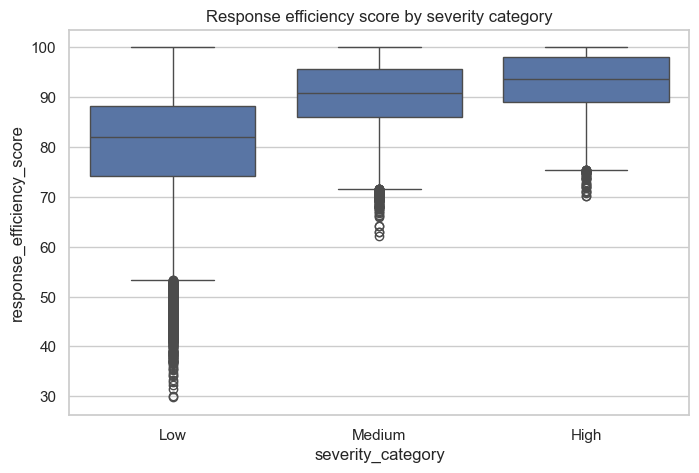

In [20]:
# Response efficiency vs severity category

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="severity_category", y="response_efficiency_score")
plt.title("Response efficiency score by severity category")
plt.show() # This plot shows how response efficiency varies with disaster severity (ex -  higher severity often has lower efficiency)

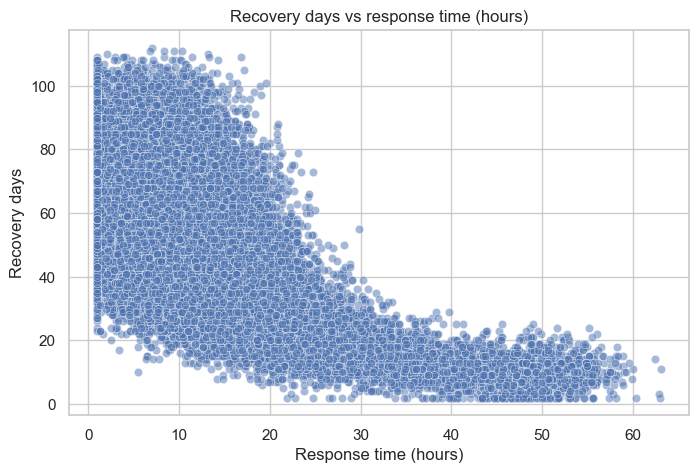

In [22]:
# Recovery days vs response time

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="response_time_hours", y="recovery_days", alpha=0.5)
plt.title("Recovery days vs response time (hours)")
plt.xlabel("Response time (hours)")
plt.ylabel("Recovery days")   # We can see if longer response times are associated with longer recovery periods

plt.show()

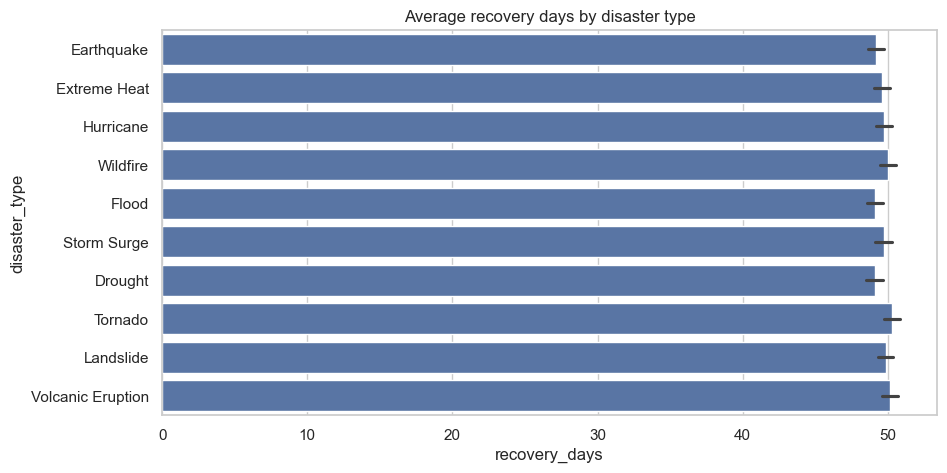

In [24]:
#  Average recovery days per disaster type

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="recovery_days", y="disaster_type", estimator="mean")
plt.title("Average recovery days by disaster type")  # Some disaster types tend to require more recovery days than others
plt.show()

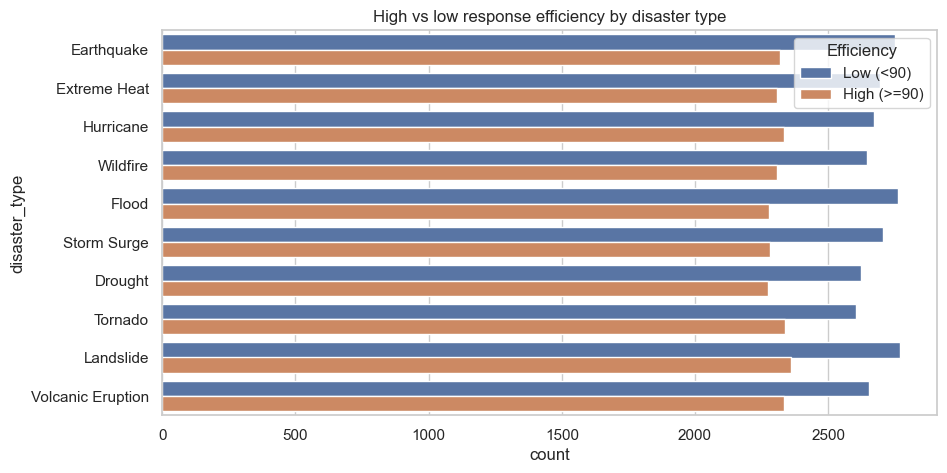

In [26]:
#  High vs low efficiency by disaster type

plt.figure(figsize=(10,5))
sns.countplot(data=df, y="disaster_type", hue="high_efficiency")
plt.title("High vs low response efficiency by disaster type")
plt.legend(title="Efficiency", labels=["Low (<90)", "High (>=90)"])
plt.show()  # This plot shows which disaster types more often have high response efficiency

### STEP 5 - PREPARE DATA FOR MACHINE LEARNING

In [27]:
feature_cols = [
    "severity_index",
    "casualties",
    "economic_loss_usd",
    "response_time_hours",
    "aid_amount_usd",
    "recovery_days",
    "year",
    "month",
    "country",
    "disaster_type"
]

target_col = "high_efficiency"

X = df[feature_cols]
y = df[target_col]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify=y keeps the same proportion of high/low efficiency in train and test
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (40000, 10)
Test shape: (10000, 10)


### STEP 6 - BUILD AND TRAIN A MODEL

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

numeric_features = [
    "severity_index",
    "casualties",
    "economic_loss_usd",
    "response_time_hours",
    "aid_amount_usd",
    "recovery_days",
    "year",
    "month"
]

categorical_features = ["country", "disaster_type"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

model = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42, n_estimators=100)
)

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['severity_index',
                                                   'casualties',
                                                   'economic_loss_usd',
                                                   'response_time_hours',
                                                   'aid_amount_usd',
                                                   'recovery_days', 'year',
                                                   'month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country',
                                                   'disaster_type'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

### STEP 7 - EVALUATE THE MODEL

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
# In machine learning and statistics, accuracy is a performance metric that measures how often a model's predictions align with actual outcomes. It represents the proportion of correct classifications out of the total number of cases analyzed

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Low (<90)", "High (>=90)"]))

Accuracy: 0.7926

Classification report:
              precision    recall  f1-score   support

   Low (<90)       0.81      0.81      0.81      5375
 High (>=90)       0.78      0.78      0.78      4625

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### STEP 8 - FEATURE INTERPRETATION

In [33]:
# Get feature names after preprocessing
ohe = model.named_steps["columntransformer"].named_transformers_["cat"]
feature_names = numeric_features + list(ohe.get_feature_names_out(categorical_features))

# Get importances from RandomForest
rf = model.named_steps["randomforestclassifier"]
importances = pd.Series(rf.feature_importances_, index=feature_names)

# Show top 15
top_importances = importances.sort_values(ascending=False).head(15)
print(top_importances)

response_time_hours                0.367965
severity_index                     0.104908
recovery_days                      0.090290
aid_amount_usd                     0.081069
casualties                         0.075763
economic_loss_usd                  0.074679
month                              0.038991
year                               0.031201
disaster_type_Hurricane            0.005849
disaster_type_Extreme Heat         0.005664
disaster_type_Landslide            0.005663
disaster_type_Earthquake           0.005644
disaster_type_Volcanic Eruption    0.005578
disaster_type_Wildfire             0.005541
disaster_type_Flood                0.005509
dtype: float64


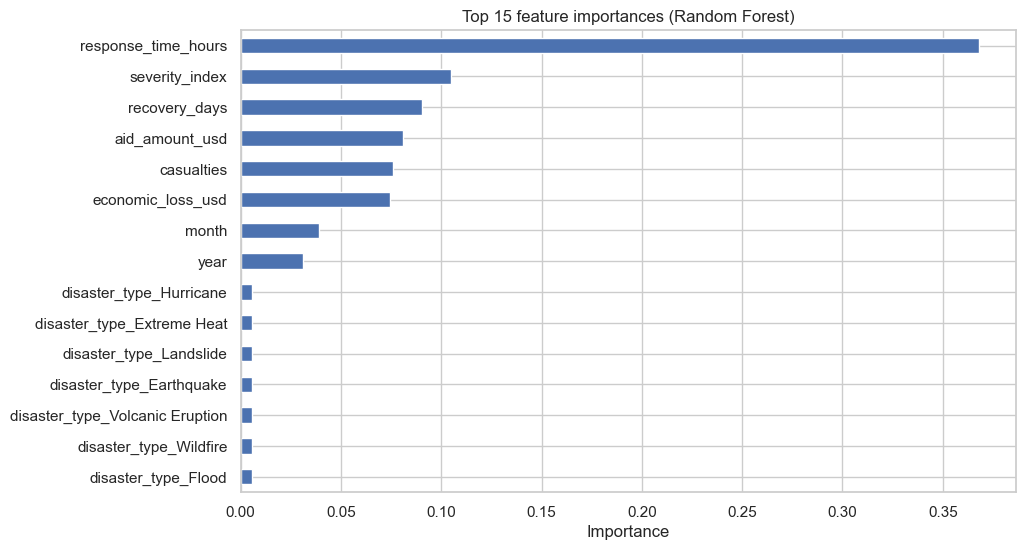

In [36]:
# The most important features for predicting high response efficiency are
# Features like aid_amount_usd, response_time_hours, and severity_index strongly influence whether the response efficiency is high or low


plt.figure(figsize=(10,6))
top_importances.sort_values().plot(kind="barh")
plt.title("Top 15 feature importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

### STEP 9 - FINAL REPORT